<a href="https://colab.research.google.com/github/DivyanshiChawla/OIB-SIP/blob/main/Unemployment_Analysis_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Unemployment in India.csv')
df_11_2020 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df_11_2020.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df_11_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


**Estimation Labour Participation Rate (%)->** bold text Measure that represents the proportion of the working-age population that is either employed or seeking employment.

                    Labour Force Participation Rate (%) = (Labour Force / Working-age population) x 100

  The Labour Force includes both employed individuals and those who are unemployed but actively seeking work.
  The Working-age Population refers to the total number of individuals who are of working age and considered to be part of the labour force potential. The definition of working age can vary depending on the country and context.

  **Estimated Employed->** It represents the count of people who have jobs or are engaged in some form of employment.

  **Estimated Unemployment Rate(%)->** It is calculated by dividing the number of unemployed individuals by the total Labour Force.

                    Estimated Unemployment Rate (%) = (Number of Unemployed / Labour Force) x 100


In [ ]:
df.shape

(768, 7)

In [ ]:
df_11_2020.shape

(267, 9)

In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
df_11_2020.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


**Checking Null Values**

In [ ]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df_11_2020.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
df_11_2020.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
# dropping null values
df = df.dropna()

In [ ]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [ ]:
df.shape

(740, 7)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_11_2020.duplicated().sum()

0

**Renaming columns**

In [ ]:
df.coloumns = ['Region', ' Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Area']

In [ ]:
df_11_2020.coloumns = ['Region', ' Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region.1']

In [ ]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df_11_2020.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
df.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


In [ ]:
df_11_2020.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [ ]:
df['Region'].value_counts().idxmax()

'Andhra Pradesh'

In [ ]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [ ]:
df_11_2020['Region'].value_counts().idxmax()

'Andhra Pradesh'

In [ ]:
df['Region'].value_counts().idxmin()

'Chandigarh'

In [ ]:
df_11_2020['Region'].value_counts().idxmin()

'Sikkim'

In [ ]:
# Month of Unemployment
# To convert the 'Date' column to a datetime type, extracts the month as an integer, and adds a new coloumn
# with a corrsponding three-letter month abbreviation


import datetime as dt
import calendar

df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)
df['month_int'] = df[' Date'].dt.month
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df_11_2020[' Date'] = pd.to_datetime(df_11_2020[' Date'], dayfirst=True)
df_11_2020['month_int'] = df_11_2020[' Date'].dt.month
df_11_2020['month'] = df_11_2020['month_int'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# month with highest unemployment
df['month'].value_counts().idxmax()

'May'

In [ ]:
df_11_2020['month'].value_counts().idxmax()

'Mar'

In [ ]:
# month with lowest unemployment
df['month'].value_counts().idxmin()

'Apr'

In [ ]:
df_11_2020['month'].value_counts().idxmin()

'Jan'

In [ ]:
df.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


In [ ]:
df_11_2020.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


In [ ]:
df.drop(columns=[' Frequency','month_int'])

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [ ]:
df_11_2020.drop(columns=[' Frequency','month_int'])

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,Jan
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,Feb
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,Mar
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,Apr
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,May
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,Jun
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,Jul
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,Aug
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,Sep


In [ ]:
# top 10 regions with highest unemployment
df1 = df[['Region',' Estimated Unemployment Rate (%)']].groupby('Region').sum().sort_values(' Estimated Unemployment Rate (%)', ascending=False)

In [ ]:
df1_11_2020 = df_11_2020[['Region',' Estimated Unemployment Rate (%)']].groupby('Region').sum().sort_values(' Estimated Unemployment Rate (%)', ascending=False)

In [ ]:
df1.head(10)

,Estimated Unemployment Rate (%)
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


In [ ]:
df1_11_2020.head(10)

,Estimated Unemployment Rate (%)
Region,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


**Visualisation**

Text(0, 0.5, 'Unemployment Rate (%)')

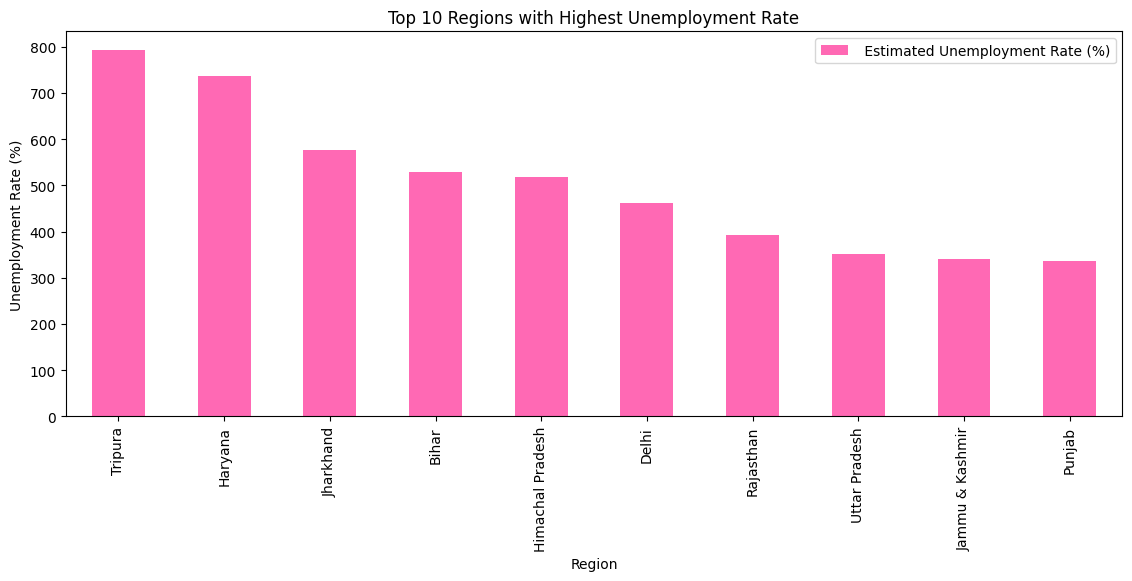

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df1[:10].plot(kind='bar', color='hotpink', figsize=(30,5), ax=ax0)
ax0.set_title('Top 10 Regions with Highest Unemployment Rate')
ax0.set_xlabel('Region')
ax0.set_ylabel('Unemployment Rate (%)')

Text(0, 0.5, 'Unemployment Rate (%)')

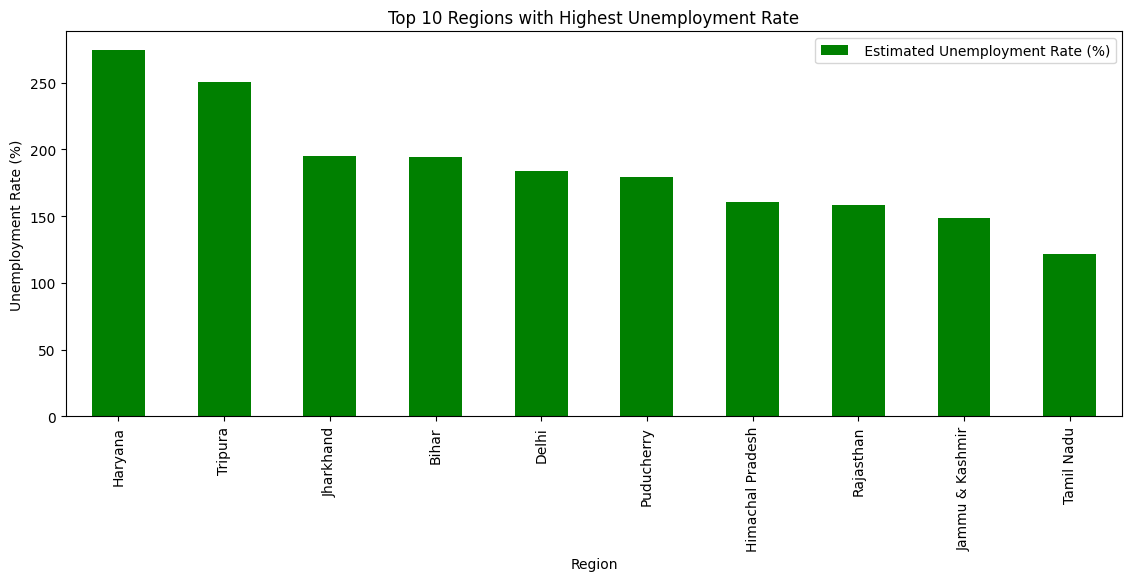

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df1_11_2020[:10].plot(kind='bar', color='green', figsize=(30,5), ax=ax0)
ax0.set_title('Top 10 Regions with Highest Unemployment Rate')
ax0.set_xlabel('Region')
ax0.set_ylabel('Unemployment Rate (%)')

In [ ]:
# Month with highest unemployment
df2 = df[['month',' Estimated Unemployment Rate (%)']].groupby('month').sum().sort_values(' Estimated Unemployment Rate (%)', ascending=False)
df2.head(10)

,Estimated Unemployment Rate (%)
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


In [ ]:
df2_11_2020 = df_11_2020[['month',' Estimated Unemployment Rate (%)']].groupby('month').sum().sort_values(' Estimated Unemployment Rate (%)', ascending=False)
df2_11_2020.head(10)

,Estimated Unemployment Rate (%)
month,
May,627.60
Apr,578.14
Jun,294.60
Mar,291.13
Aug,278.46
Jul,265.53
Feb,240.92
Jan,239.11
Sep,235.06


Text(0, 0.5, 'Unemployment Rate (%)')

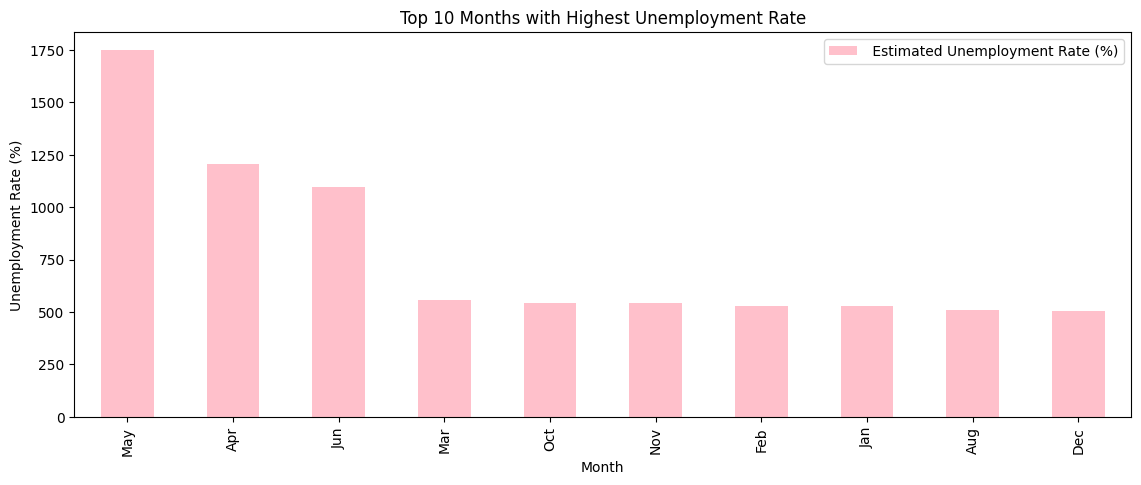

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df2[:10].plot(kind='bar', color='pink', figsize=(30,5), ax=ax0)
ax0.set_title('Top 10 Months with Highest Unemployment Rate')
ax0.set_xlabel('Month')
ax0.set_ylabel('Unemployment Rate (%)')

Text(0, 0.5, 'Unemployment Rate (%)')

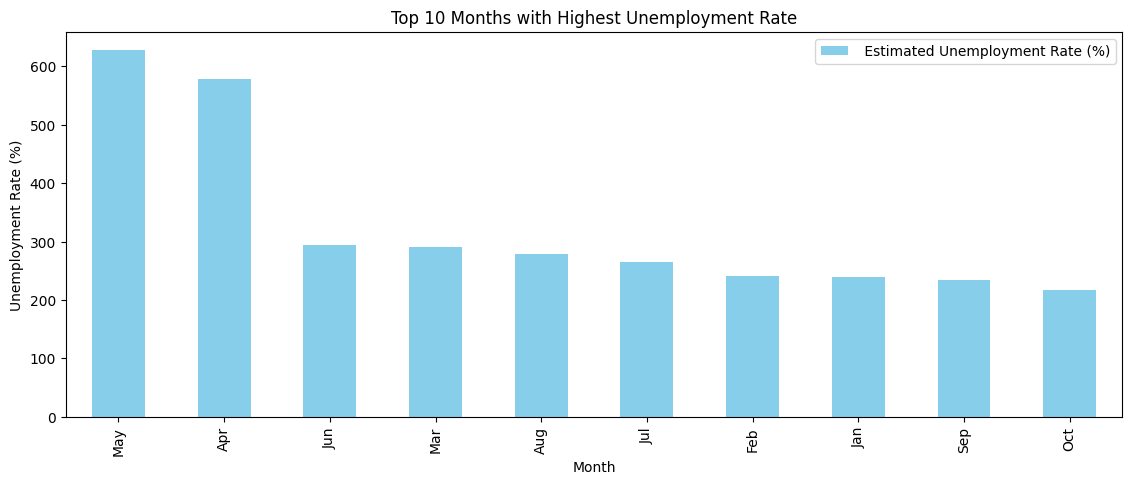

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df2_11_2020[:10].plot(kind='bar', color='skyblue', figsize=(30,5), ax=ax0)
ax0.set_title('Top 10 Months with Highest Unemployment Rate')
ax0.set_xlabel('Month')
ax0.set_ylabel('Unemployment Rate (%)')

In [ ]:
# Region wise Estimated Employed
df3 = df[['Region',' Estimated Employed']].groupby('Region').sum().sort_values(' Estimated Employed', ascending=False)
df3.head(10)

,Estimated Employed
Region,
Uttar Pradesh,786655301.0
Maharashtra,559725484.0
West Bengal,481559064.0
Bihar,346253296.0
Tamil Nadu,343547309.0
Gujarat,319256358.0
Madhya Pradesh,311233561.0
Karnataka,298679340.0
Rajasthan,281149813.0


Text(0, 0.5, ' Estimated Employed')

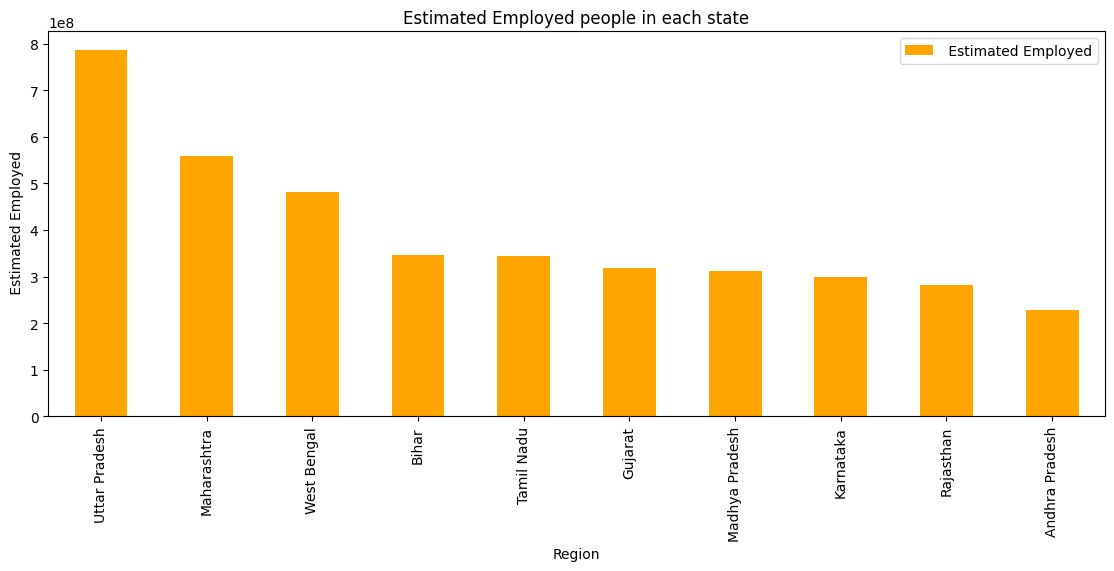

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df3[:10].plot(kind='bar', color='orange', figsize=(30,5), ax=ax0)
ax0.set_title('Estimated Employed people in each state')
ax0.set_xlabel('Region')
ax0.set_ylabel(' Estimated Employed')

In [ ]:
df3_11_2020 = df_11_2020[['Region',' Estimated Employed']].groupby('Region').sum().sort_values(' Estimated Employed', ascending=False)
df3_11_2020.head(10)

,Estimated Employed
Region,
Uttar Pradesh,555247990
Maharashtra,392047582
West Bengal,333051643
Bihar,236068280
Gujarat,227307461
Madhya Pradesh,223183353
Tamil Nadu,219878981
Karnataka,216240176
Rajasthan,197317522


Text(0, 0.5, ' Estimated Employed')

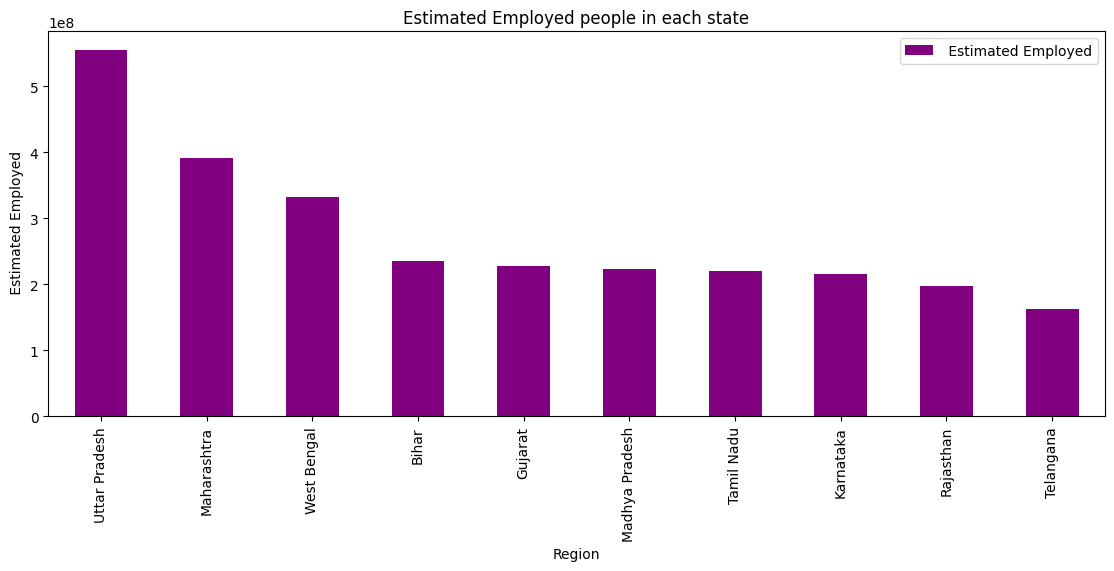

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df3_11_2020[:10].plot(kind='bar', color='purple', figsize=(30,5), ax=ax0)
ax0.set_title('Estimated Employed people in each state')
ax0.set_xlabel('Region')
ax0.set_ylabel(' Estimated Employed')

In [ ]:
# Month wise Estimated Employed
df4 = df[['month',' Estimated Employed']].groupby('month').sum().sort_values(' Estimated Employed', ascending=False)
df4.head(10)

,Estimated Employed
month,
Jun,766717078.0
May,699995530.0
Jan,406899254.0
Feb,403011803.0
Sep,402452126.0
Oct,401411032.0
Nov,400051335.0
Jul,399838967.0
Aug,399610205.0


Text(0, 0.5, ' Estimated Employed')

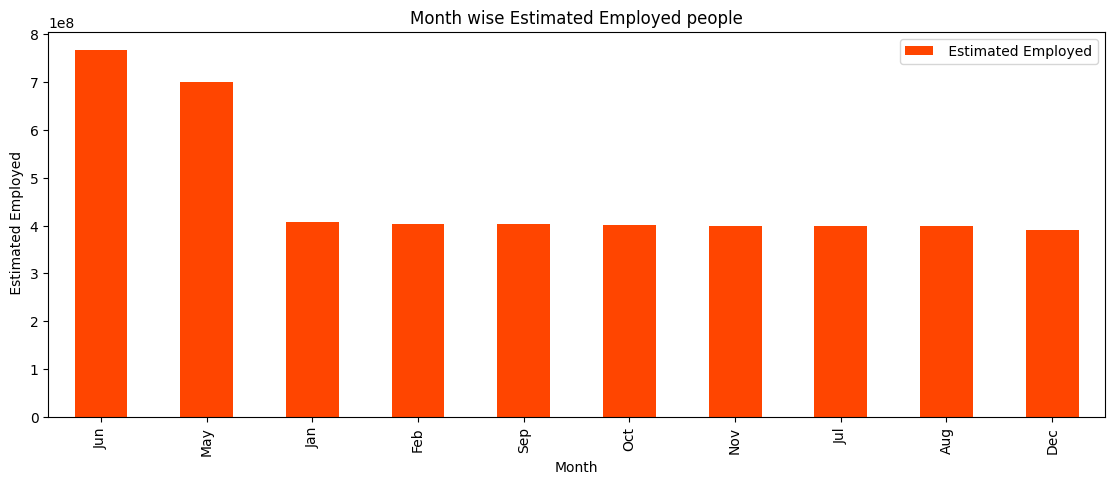

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df4[:10].plot(kind='bar', color='orangered', figsize=(30,5), ax=ax0)
ax0.set_title('Month wise Estimated Employed people')
ax0.set_xlabel('Month')
ax0.set_ylabel(' Estimated Employed')

In [ ]:
df4_11_2020 = df_11_2020[['month',' Estimated Employed']].groupby('month').sum().sort_values(' Estimated Employed', ascending=False)
df4_11_2020.head(10)

,Estimated Employed
month,
Jan,406567194
Feb,402694917
Sep,393871643
Oct,393659474
Mar,392543817
Aug,389584135
Jul,389286580
Jun,374149633
May,310699661


Text(0, 0.5, ' Estimated Employed')

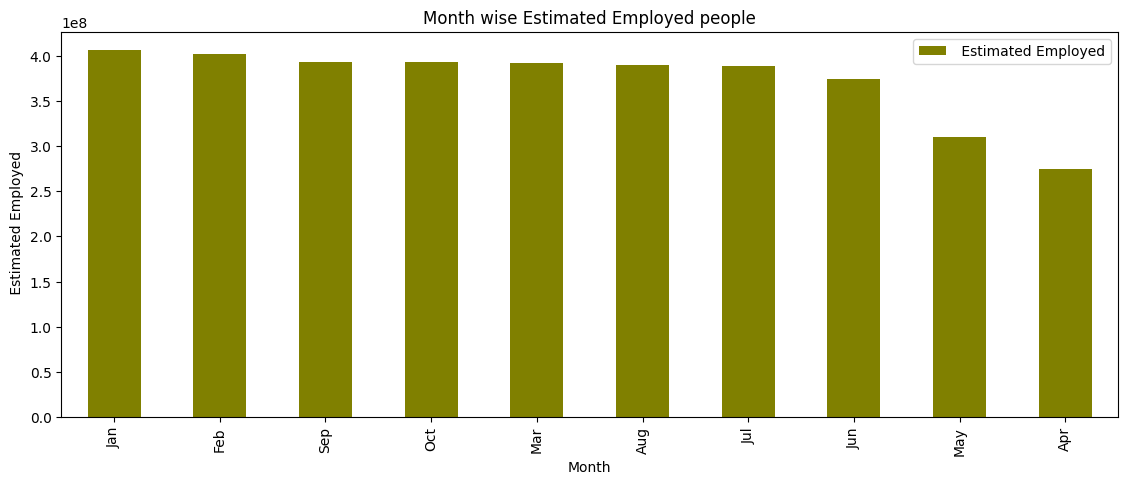

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df4_11_2020[:10].plot(kind='bar', color='olive', figsize=(30,5), ax=ax0)
ax0.set_title('Month wise Estimated Employed people')
ax0.set_xlabel('Month')
ax0.set_ylabel(' Estimated Employed')

In [ ]:
# plotting sunburst
unemployment = df[['Region','Area',' Estimated Unemployment Rate (%)']]
figure = px.sunburst(unemployment,path=['Area','Region'],
                     values=' Estimated Unemployment Rate (%)',
                     width=700,height=600, color_continuous_scale='RdY1Gn',
                     title="Unemployment Rate in India")
figure.show()

In [ ]:
unemployment = df_11_2020[['Region','Region.1',' Estimated Unemployment Rate (%)']]
figure = px.sunburst(unemployment,path=['Region.1','Region'],
                     values=' Estimated Unemployment Rate (%)',
                     width=700,height=600, color_continuous_scale='RdY1Gn',
                     title="Unemployment Rate in India upto Nov 2020")
figure.show()